In [31]:
import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np

In [32]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.2435, 0.2616))
])


trainset = dsets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = dsets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [36]:
# Получим метки классов для обучающего датасета
train_labels = np.array(trainset.targets)

# Подсчитаем количество примеров для каждого класса
class_counts = np.bincount(train_labels)

# Выведем количество примеров для каждого класса
for i, count in enumerate(class_counts):
    print(f"Class {i} ({classes[i]}): {count} examples")


Class 0 (plane): 5000 examples
Class 1 (car): 5000 examples
Class 2 (bird): 5000 examples
Class 3 (cat): 5000 examples
Class 4 (deer): 5000 examples
Class 5 (dog): 5000 examples
Class 6 (frog): 5000 examples
Class 7 (horse): 5000 examples
Class 8 (ship): 5000 examples
Class 9 (truck): 5000 examples


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


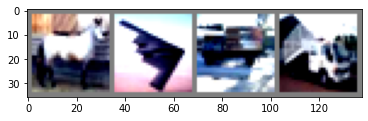

Метки классов:  horse plane truck truck


In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для отображения изображения
def imshow(img):
    # Обратная нормализация изображения
    img = img / 2 + 0.5     
    npimg = img.numpy() # Конвертация тензора PyTorch в массив NumPy
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # Отображение изображения
    plt.show()

# Получение случайных изображений из тренировочного датасета
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Отображение изображений и меток классов
imshow(torchvision.utils.make_grid(images)) # Использование функции imshow() для вывода изображений
print('Метки классов: ', ' '.join('%5s' % classes[labels[j]] for j in range(4))) # Вывод меток классов


In [38]:
import torch.nn as nn
import torch.nn.functional as F

# Определение класса нейронной сети
class Net(nn.Module):
    # Определение слоев нейронной сети в методе __init__()
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # Первый сверточный слой
        self.pool = nn.MaxPool2d(2, 2) # Слой пулинга
        self.conv2 = nn.Conv2d(6, 16, 5) # Второй сверточный слой
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # Первый полносвязный слой
        self.fc2 = nn.Linear(120, 84) # Второй полносвязный слой
        self.fc3 = nn.Linear(84, 10) # Третий полносвязный слой

    # Определение процесса прохождения данных через нейронную сеть в методе forward()
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # Прохождение данных через первый сверточный слой и слой пулинга
        x = self.pool(F.relu(self.conv2(x))) # Прохождение данных через второй сверточный слой и слой пулинга
        x = x.view(-1, 16 * 5 * 5) # Преобразование данных в вектор
        x = F.relu(self.fc1(x)) # Прохождение данных через первый полносвязный слой
        x = F.relu(self.fc2(x)) # Прохождение данных через второй полносвязный слой
        x = self.fc3(x) # Прохождение данных через третий полносвязный слой
        return x

# Создание объекта нейронной сети
net = Net()

In [39]:
import torch.optim as optim

# Создаем критерий потерь (функцию потерь), который будет использоваться для определения ошибки модели
# В данном случае выбираем кросс-энтропийную потерю, так как это распространенный выбор для задач классификации
criterion = nn.CrossEntropyLoss()

# Создаем оптимизатор для обновления параметров модели на основе градиентного спуска с моментумом
# В данном случае используется стохастический градиентный спуск (SGD) с коэффициентом обучения 0.001 и моментумом 0.9
# `net.parameters()` передается оптимизатору, чтобы он знал, какие параметры модели нужно оптимизировать
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
flag = 0
# Выбираем 2 эпохи
for epoch in range(2):
    
    if flag == 1:
        break

    # Инициализация переменной для хранения суммы потерь на текущей эпохе
    running_loss = 0.0

    # Цикл по данным в trainloader (по батчам)
    # enumerate позволяет получать индекс i (номер текущего батча) и данные (data)
    for i, data in enumerate(trainloader, 0):

        # Извлекаем входные данные (inputs) и метки (labels) из data
        inputs, labels = data

        # Обнуляем градиенты параметров модели перед каждым шагом оптимизации
        optimizer.zero_grad()

        # Проходим вперед по модели (вычисляем предсказания)
        outputs = net(inputs)

        # Вычисляем потери с помощью функции потерь (критерия)
        loss = criterion(outputs, labels)

        # Проходим назад по модели (вычисляем градиенты)
        loss.backward()

        # Обновляем параметры модели с помощью оптимизатора
        optimizer.step()

        # Накапливаем потери для текущей эпохи
        running_loss += loss.item()

        # Выводим статистику каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            # Останавливаем обучение если loss достиг нужного нам порога, вычисленного опытным путем
            if running_loss / 2000 <= 1.29:
                print('Loss threshold reached, stopping training')
                flag = 1
                break
            # Обнуляем накопленную потерю после вывода статистики
            running_loss = 0.0

# Выводим сообщение о завершении обучения
print('Finished Training')

In [41]:
# Задаем путь для сохранения обученной модели (в формате .pth)
PATH = './cifar_net.pth'

# Сохраняем состояние модели (параметры и веса) в файл, указанный в PATH
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


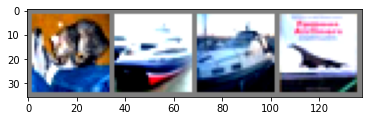

GroundTruth:    cat  ship  ship plane


In [28]:
# Создаем итератор для testloader, который будет использоваться для извлечения данных
dataiter = iter(testloader)

# Извлекаем один батч данных (изображений и меток) с помощью next()
images, labels = next(dataiter)

# Выводим изображения с использованием функции imshow, которая должна быть определена ранее
# torchvision.utils.make_grid() объединяет изображения из батча в сетку для удобного отображения
imshow(torchvision.utils.make_grid(images))

# Выводим истинные метки (GroundTruth) для изображений из батча
# Здесь используется генератор списков для получения имен классов, соответствующих меткам
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [29]:
# Создаем новый экземпляр модели (сети) с той же структурой, что и обученная модель
net = Net()

# Загружаем сохраненное состояние модели (параметры и веса) из файла PATH
net.load_state_dict(torch.load(PATH))

# Вычисляем предсказания для изображений из предыдущего блока кода (батч из testloader)
outputs = net(images)

# Находим индекс максимального значения в каждой строке тензора outputs (по оси 1)
# Это соответствует предсказанным меткам классов
_, predicted = torch.max(outputs, 1)

# Выводим предсказанные метки классов для изображений из батча
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    cat   car  ship  ship


In [30]:
# Инициализируем счетчики для подсчета количества правильных предсказаний и общего количества предсказаний
correct = 0
total = 0

# torch.no_grad() отключает вычисление градиентов, что ускоряет процесс и экономит память,
# так как во время тестирования градиенты не нужны
with torch.no_grad():
    # Цикл по данным в testloader (по мини-пакетам или батчам)
    for data in testloader:
        # Извлекаем входные данные (inputs) и метки (labels) из data
        images, labels = data

        # Проходим вперед по модели (вычисляем предсказания)
        outputs = net(images)

        # Находим индекс максимального значения в каждой строке тензора outputs (по оси 1)
        # Это соответствует предсказанным меткам классов
        _, predicted = torch.max(outputs.data, 1)

        # Увеличиваем общий счетчик предсказаний на размер текущего батча
        total += labels.size(0)

        # Увеличиваем счетчик правильных предсказаний на количество совпадений между
        # предсказанными и истинными метками классов
        correct += (predicted == labels).sum().item()

# Выводим процент правильных предсказаний (точность) на тестовом датасете из 10000 изображений
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 56 %


In [17]:
# Создаем списки для подсчета правильных предсказаний и общего количества предсказаний для каждого класса
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# torch.no_grad() отключает вычисление градиентов, что ускоряет процесс и экономит память,
# так как во время тестирования градиенты не нужны
with torch.no_grad():
    # Цикл по данным в testloader (по батчам)
    for data in testloader:
        # Извлекаем входные данные (inputs) и метки (labels) из data
        images, labels = data

        # Проходим вперед по модели (вычисляем предсказания)
        outputs = net(images)

        # Находим индекс максимального значения в каждой строке тензора outputs (по оси 1)
        # Это соответствует предсказанным меткам классов
        _, predicted = torch.max(outputs, 1)

        # Вычисляем тензор, содержащий значения True/False для совпадения предсказанных и истинных меток
        c = (predicted == labels).squeeze()

        # Цикл по изображениям в текущем батче (по умолчанию размер батча - 4)
        for i in range(4):
            # Получаем метку класса для i-го изображения
            label = labels[i]

            # Увеличиваем счетчик правильных предсказаний для данного класса на значение True/False (1/0)
            class_correct[label] += c[i].item()

            # Увеличиваем общий счетчик предсказаний для данного класса
            class_total[label] += 1

# Выводим точность для каждого из 10 классов
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 36 %
Accuracy of   car : 70 %
Accuracy of  bird : 35 %
Accuracy of   cat : 29 %
Accuracy of  deer : 28 %
Accuracy of   dog : 58 %
Accuracy of  frog : 44 %
Accuracy of horse : 72 %
Accuracy of  ship : 72 %
Accuracy of truck : 69 %
